In [23]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [24]:
# Directories - Change as desired
bca_file_path = "C:/Users/plutzer/Box/CellBio-MajorLab/Users/Isaac/Lab Notebook/Lab_data/BCA_IBP_20210701_163634.xlsx"
figure_base = bca_file_path[:len(bca_file_path)-5]
expt_name = bca_file_path.split('/')[-1].split('.')[0]

In [25]:
# load file
df = pd.read_excel(bca_file_path,header=11)
df = df.set_index('Unnamed: 0')
mat = df.to_numpy()
df.index.names = [' ']
df

,1,2,3,4,5,6,7,8,9,10,11,12
,,,,,,,,,,,,
A,0.625,0.557,0.438,0.472,0.569,0.602,NaN,NaN,NaN,NaN,NaN,NaN
B,0.403,0.317,0.302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,0.256,0.245,0.249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,0.196,0.172,0.218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,0.147,0.127,0.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,0.115,0.112,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,0.103,0.098,0.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,0.092,0.086,0.089,0.092,0.093,0.097,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Plate setup

# Standards go in the first n cols, using all the rows as shown below
row_order = ['A','B','C','D','E','F','G','H']

##### STANDARDS - listed in ug/mL ##### 
standards = {
    'A':1000,
    'B':500,
    'C':250,
    'D':125,
    'E':62.5,
    'F':31.3,
    'G':15.6,
    'H':0
}

# Add standards to ignore if you have some outliers
# ignore = ['A']
ignore = []

# Change if needed
num_standard_reps = 3

# Positions of samples
samples_positions = [
    [[0,3],[0,4]],
    [[7,3],[7,4],[7,5]]
]

# Sample names corresponding to the above positions
samples_names = [
    'HEK293T test',
    '0.1% Formic Acid Blank'
]

In [31]:
# Generate points for the standard curve
concentrations_x = []
absorbances_y = []
for row in range(len(row_order)):
    if row_order[row] not in ignore:
        concentration = standards[row_order[row]]
        for col in range(num_standard_reps):
            concentrations_x.append(concentration)
            absorbances_y.append(mat[row,col])

# Add additional standards other than the main columns
additional_standards_list = [] #[[7,3],[7,4],[7,5]]
additional_standards_concentrations = [] #[0,0,0] 

for n in range(len(additional_standards_list)):
    concentrations_x.append(additional_standards_concentrations[n])
    absorbances_y.append(mat[additional_standards_list[n][0],additional_standards_list[n][1]])

HEK293T test:
	Mean Absorbance: 0.5205
	Interpolated Concentration: 943.6166332441754  ug/mL
0.1% Formic Acid Blank:
	Mean Absorbance: 0.09400000000000001
	Interpolated Concentration: -10.597567094498492  ug/mL


Text(0, 0.5, 'Net Absorbance (562nm)')

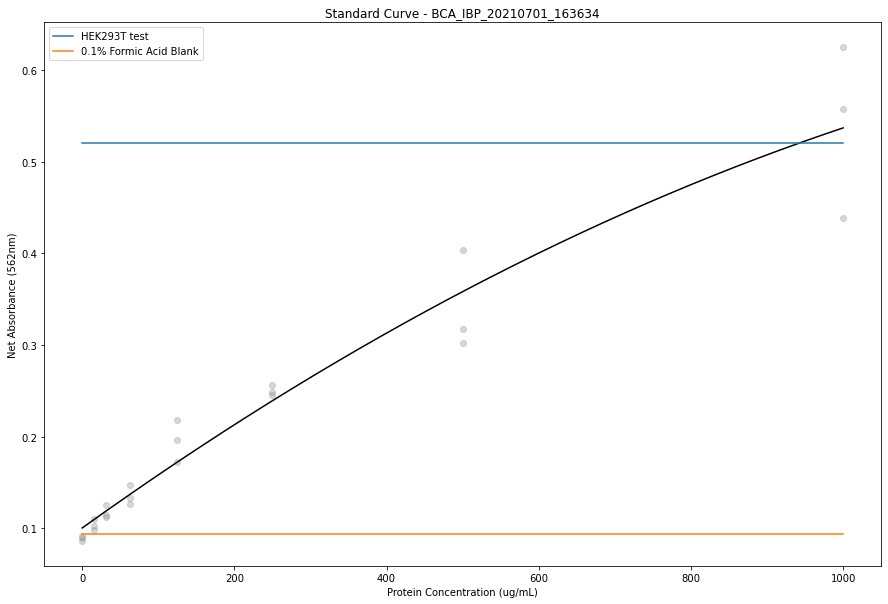

In [38]:
# Scatterplot of points
std_curve = plt.figure(figsize = (15,10))
plt.scatter(concentrations_x,absorbances_y,c='grey',alpha=0.3)

# Add a quadratic regression
model = np.poly1d(np.polyfit(concentrations_x,absorbances_y,2))
polyline = np.linspace(0,1000,1000)
plt.plot(polyline,model(polyline),c='black')


# Make interpolations for the samples
for samplenum in range(len(samples_positions)):
    sample_name = samples_names[samplenum]
    sample_abs = []
    for row,col in samples_positions[samplenum]:
        sample_abs.append(mat[row,col])
    # Get the mean absorbance and plot as a horizontal line
    plt.plot([0,1000],[np.mean(sample_abs)]*2,label=sample_name)
    print(sample_name + ':')
    print('\t' + 'Mean Absorbance: ' + str(np.mean(sample_abs)))
    
    # Interpolate the concentration for this sample using the minimum solution for the quadratic equation
    print('\t' + 'Interpolated Concentration: ' + str(np.min((model-np.mean(sample_abs)).r)) + '  ug/mL')

plt.legend()
plt.title('Standard Curve - ' + expt_name)
plt.xlabel('Protein Concentration (ug/mL)')
plt.ylabel('Net Absorbance (562nm)')

In [33]:
# Run this to save the figure
save_path = figure_base + '.png'
std_curve.savefig(save_path)

In [37]:
(model-0.5).r

array([2876.38309746,  876.69605556])

poly1d([-4.85899346e-06,  6.42426259e-03,  2.59579239e-01])